In [151]:
import pandas as pd #includes dataset libraries
import seaborn as sns #for graph generate 
import numpy as np #NumPy is a library for adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #machine learning library, It features various classification, regression and clustering algorithms including support vector machines, ...

In [152]:
df = pd.read_csv('weatherAUS.csv') #reading dataset

In [153]:
df.head() #shows first 5 touples 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


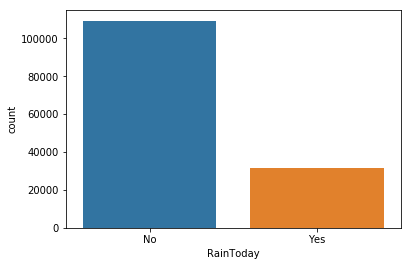

In [154]:
sns.countplot(df['RainToday'])

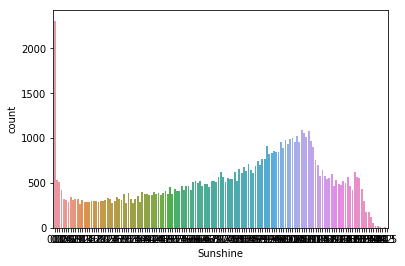

In [156]:
sns.countplot(df['Sunshine'])

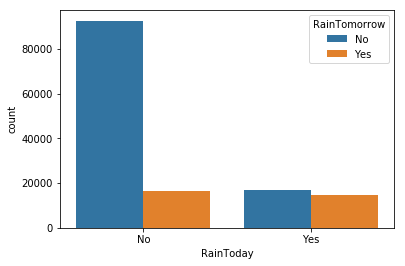

In [158]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])

In [142]:
df = df.drop(['Date','Location'], axis = 1) #exclude/ drop selected attributes from dataset

In [143]:
df.head()#shows first 5 touples 


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [144]:
df.info() # these algorithms does not work with string & object type data. So, Here we are checking datatypes.. with info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null obj

In [145]:
from sklearn.preprocessing import LabelEncoder # convert object type data to float/int type data.. because, we found 5 object..Note: decition attributes can be object/ string
labelencoder = LabelEncoder()
df['WindGustDir'] = labelencoder.fit_transform(df['WindGustDir'].astype(str))
df['WindDir9am'] = labelencoder.fit_transform(df['WindDir9am'].astype(str))
df['WindDir3pm'] = labelencoder.fit_transform(df['WindDir3pm'].astype(str))
df['RainToday'] = labelencoder.fit_transform(df['RainToday'].astype(str))
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,No
1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,No
2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,No
3,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,No
4,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,No
5,14.6,29.7,0.2,NaN,NaN,14,56.0,13,13,19.0,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0.0,No
6,14.3,25.0,0.0,NaN,NaN,13,50.0,12,13,20.0,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0.0,No
7,7.7,26.7,0.0,NaN,NaN,13,35.0,10,13,6.0,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0.0,No
8,9.7,31.9,0.0,NaN,NaN,6,80.0,9,7,7.0,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,1.4,Yes
9,13.1,30.1,1.4,NaN,NaN,13,28.0,8,10,15.0,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1,0.0,No


In [146]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      142193 non-null int64
WindGustSpeed    132923 non-null float64
WindDir9am       142193 non-null int64
WindDir3pm       142193 non-null int64
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        142193 non-null int64
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null object


In [147]:
df.isna().any() # checking null values in all attributes.. 

MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed     True
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [148]:
#so, fillup null values with their mean value by mean() function..
df = df.fillna(df[['MinTemp']].mean())
df = df.fillna(df[['MaxTemp']].mean())
df = df.fillna(df[['Rainfall']].mean())
df = df.fillna(df[['Evaporation']].mean())
df = df.fillna(df[['Sunshine']].mean())
df = df.fillna(df[['WindGustSpeed']].mean())
df = df.fillna(df[['WindDir9am']].mean())
df = df.fillna(df[['WindDir3pm']].mean())
df = df.fillna(df[['WindSpeed9am']].mean())
df = df.fillna(df[['WindSpeed3pm']].mean())
df = df.fillna(df[['Humidity9am']].mean())
df = df.fillna(df[['Humidity3pm']].mean())
df = df.fillna(df[['Pressure9am']].mean())
df = df.fillna(df[['Pressure3pm']].mean())
df = df.fillna(df[['Cloud9am']].mean())
df = df.fillna(df[['Cloud3pm']].mean())
df = df.fillna(df[['Temp9am']].mean())
df = df.fillna(df[['Temp3pm']].mean())


In [149]:
df.isna().any() # check again null values ..so, there is no null values..

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [107]:
X = df.iloc[:,0:21] #set all values except decision attributes (RainTommorow) in X (array)
Y = df.iloc[:,21] #set decision attributes (RainTommorow) in Y (array)
Y.head() #check RainTomorrow wheather present or not in Y... result RainTomorrow is Present 

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [108]:
########### DECISION TREE ALGORITHM  ####################

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=0)

In [131]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_predict =dt.predict(X_test)
print(Y_predict)

['No' 'No' 'No' ... 'No' 'Yes' 'No']


In [132]:
print('\nIn Decision tree accuacy is:',round(accuracy_score(Y_test,Y_predict)*100,3),'%','\n-------------------------------')
print('Confusion matrix:\n',confusion_matrix(Y_test,Y_predict),'\n')
print('Classification report:\n',classification_report(Y_test,Y_predict))


In Decision tree accuacy is: 100.0 % 
-------------------------------
Confusion matrix:
 [[44096     0]
 [    0 12782]] 

Classification report:
              precision    recall  f1-score   support

         No       1.00      1.00      1.00     44096
        Yes       1.00      1.00      1.00     12782

avg / total       1.00      1.00      1.00     56878



In [112]:
########### NAIVE BAYES ####################

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=0)

In [134]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train, Y_train)
Y_predict =NB.predict(X_test)
print(Y_predict)

['No' 'No' 'No' ... 'No' 'Yes' 'No']


In [135]:
print('\nIn Naive Byes accuacy is:',round(accuracy_score(Y_test,Y_predict)*100,3),'%','\n-------------------------------')
print('Confusion matrix:\n',confusion_matrix(Y_test,Y_predict),'\n')
print('Classification report:\n',classification_report(Y_test,Y_predict))


In Naive Byes accuacy is: 95.249 % 
-------------------------------
Confusion matrix:
 [[41397  2699]
 [    3 12779]] 

Classification report:
              precision    recall  f1-score   support

         No       1.00      0.94      0.97     44096
        Yes       0.83      1.00      0.90     12782

avg / total       0.96      0.95      0.95     56878



In [119]:
########### Random Forest ####################

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=0)

In [137]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(X_train, Y_train)
Y_predict =forest.predict(X_test)
print(Y_predict)

['No' 'No' 'No' ... 'No' 'Yes' 'No']


In [138]:
print('\nIn Random forest accuacy is:',round(accuracy_score(Y_test,Y_predict)*100,3),'%','\n-------------------------------')
print('Confusion matrix:\n',confusion_matrix(Y_test,Y_predict),'\n')
print('Classification report:\n',classification_report(Y_test,Y_predict))


In Random forest accuacy is: 99.989 % 
-------------------------------
Confusion matrix:
 [[44096     0]
 [    6 12776]] 

Classification report:
              precision    recall  f1-score   support

         No       1.00      1.00      1.00     44096
        Yes       1.00      1.00      1.00     12782

avg / total       1.00      1.00      1.00     56878



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

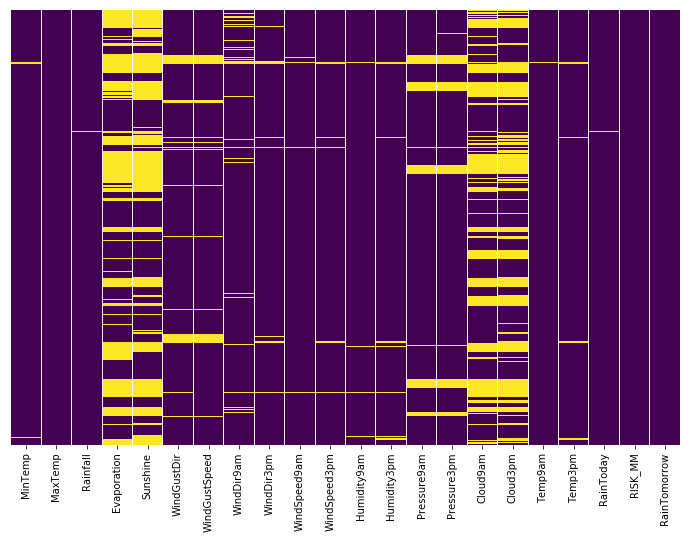

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [10]:
df = df.fillna(df[['MinTemp']].mean())

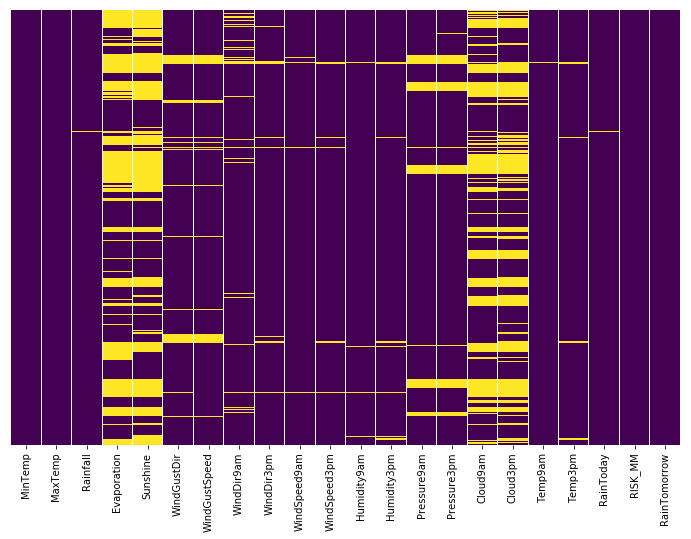

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [12]:
df = df.fillna(df[['Rainfall']].mean())

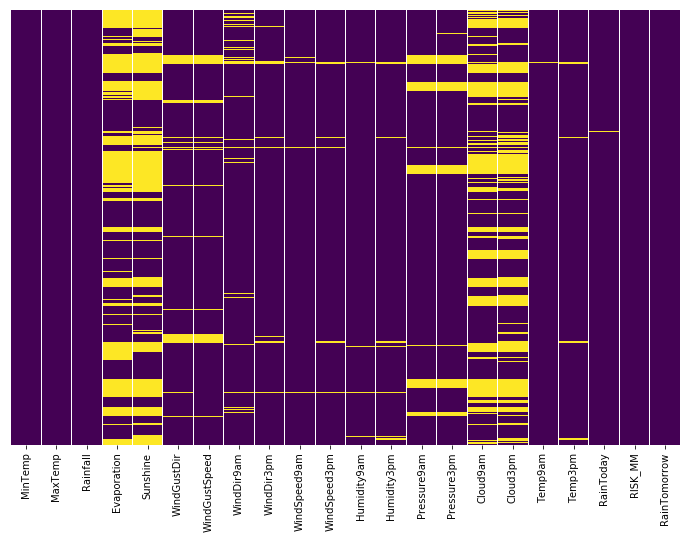

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [14]:
df = df.fillna(df[['WindSpeed9am']].mean())

In [15]:
df = df.fillna(df[['WindSpeed3pm']].mean())

In [16]:
df = df.fillna(df[['Humidity9am']].mean())

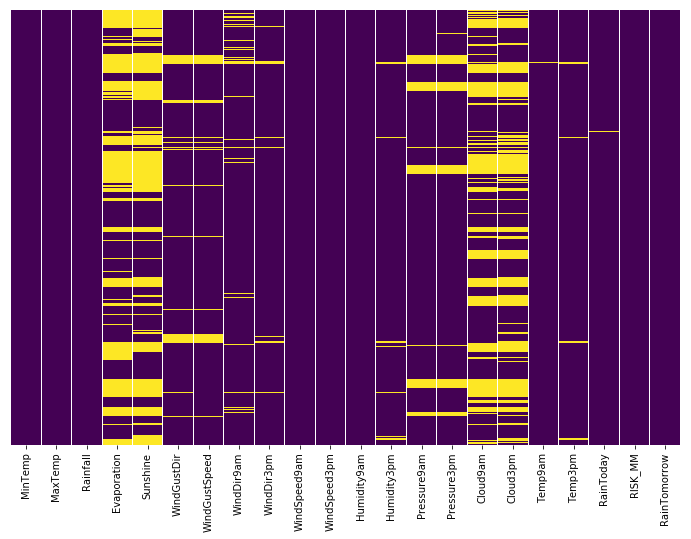

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [18]:
df = df.fillna(df[['Humidity3pm']].mean())

In [19]:
df = df.fillna(df[['Temp9am']].mean())

In [20]:
df = df.fillna(df[['Temp3pm']].mean())

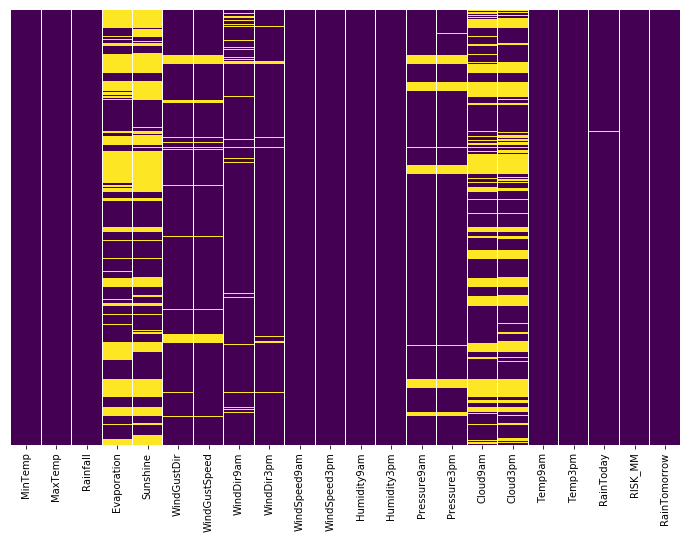

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [22]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
MinTemp          142193 non-null float64
MaxTemp          141871 non-null float64
Rainfall         142193 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null obj

In [24]:
x = df.iloc[:, [0,  2, 9, 10, 11, 12, 17, 18, 20]].values
y = df.iloc[:, 21].values

In [25]:
x

array([[13.4,  0.6, 20. , ..., 16.9, 21.8,  0. ],
       [ 7.4,  0. ,  4. , ..., 17.2, 24.3,  0. ],
       [12.9,  0. , 19. , ..., 21. , 23.2,  0. ],
       ...,
       [ 3.6,  0. , 13. , ..., 10.9, 24.5,  0. ],
       [ 5.4,  0. ,  9. , ..., 12.5, 26.1,  0. ],
       [ 7.8,  0. , 13. , ..., 15.1, 26. ,  0. ]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier(criterion='entropy', random_state = 0)

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
dt_y_pred = dt.predict(x_test)

In [33]:
print(confusion_matrix(y_test, dt_y_pred))

[[22067     0]
 [    0  6372]]


In [35]:
print(accuracy_score(y_test, dt_y_pred)*100)

100.0
